In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [61]:
data = pd.read_csv("/Users/jowaynejosephs/Desktop/jupyter_scripts/train.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [62]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [63]:
print(data.isnull().sum()) #no null values in any of the columns

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [64]:
data["Occupation"].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [79]:
data["Occupation"].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [65]:
def map_to_numerical(value):
    if value == 'Good':
        return 3
    elif value == 'Standard':
        return 2
    elif value == 'Poor':
        return 1
    else:
        return None

# Use the apply() function to create a new column "numerical_column" based on "Credit_Score"
data['Credit_Score_Numerical'] = data['Credit_Score'].apply(map_to_numerical)

# Display the updated DataFrame
print(data.info())









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

[Text(0.5, 1.0, 'Credit Scores Based on Annual Income')]

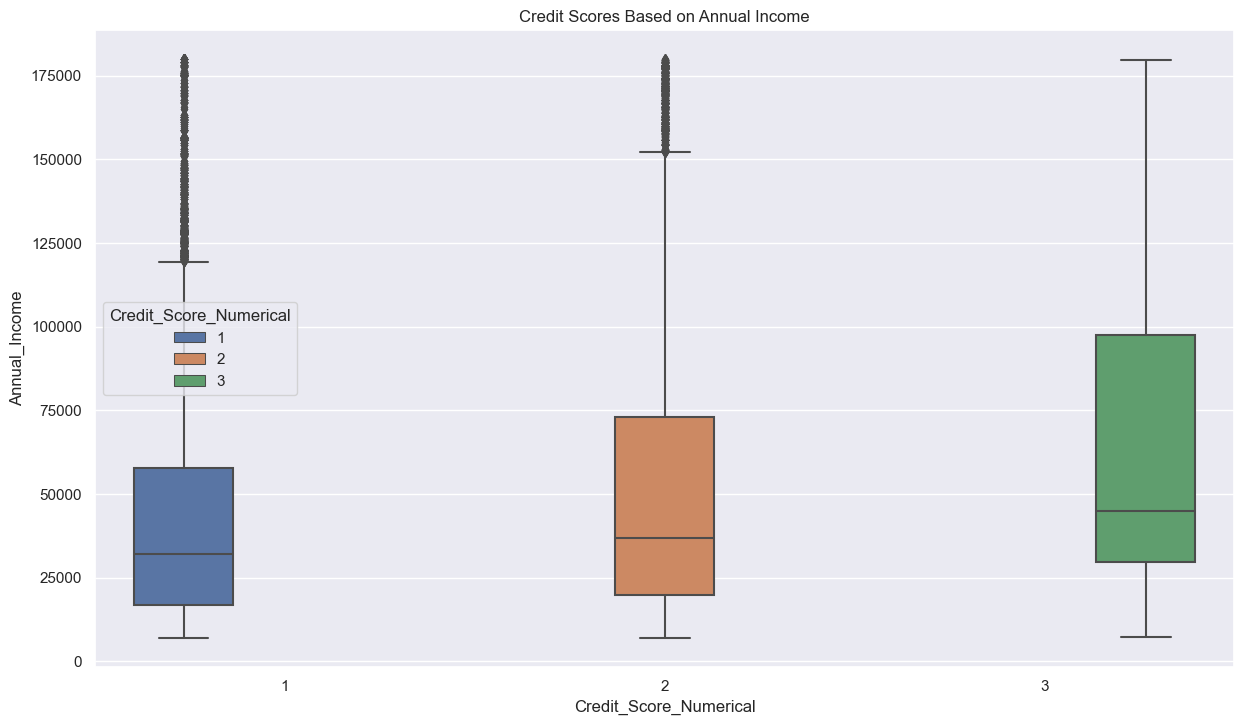

In [51]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Annual_Income",hue="Credit_Score_Numerical").set(title='Credit Scores Based on Annual Income')



[Text(0.5, 1.0, 'Credit Scores Based on Monthly Inhand Salary')]

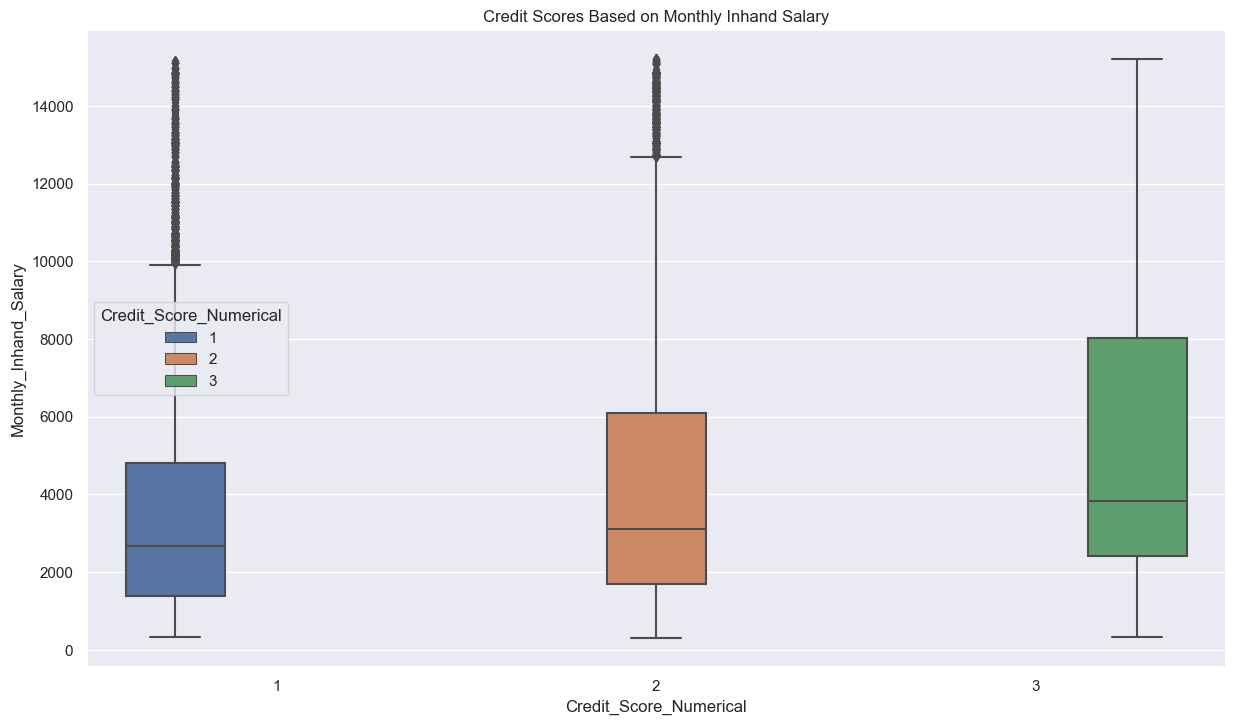

In [58]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Monthly_Inhand_Salary",hue="Credit_Score_Numerical").set(title='Credit Scores Based on Monthly Inhand Salary')



[Text(0.5, 1.0, 'Credit Scores Based on Number of Bank Accounts')]

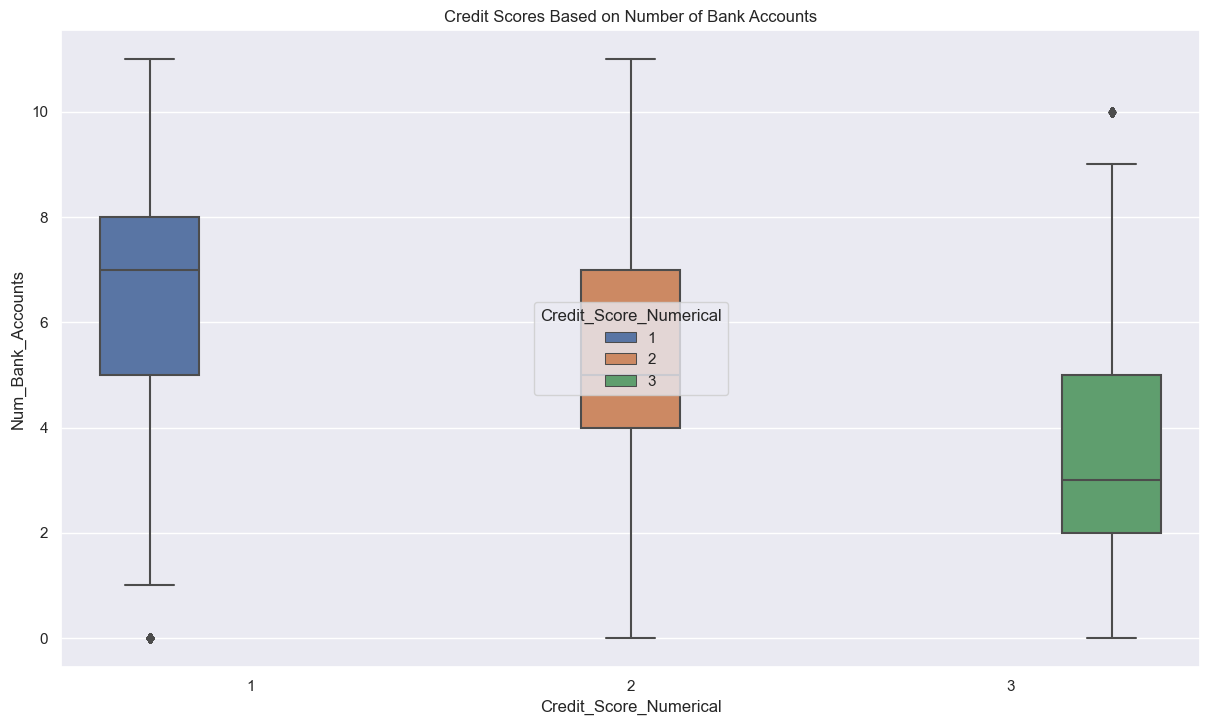

In [59]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Num_Bank_Accounts",hue="Credit_Score_Numerical").set(title='Credit Scores Based on Number of Bank Accounts')



[Text(0.5, 1.0, 'Credit Scores Based on Number of Loans Taken by the Person')]

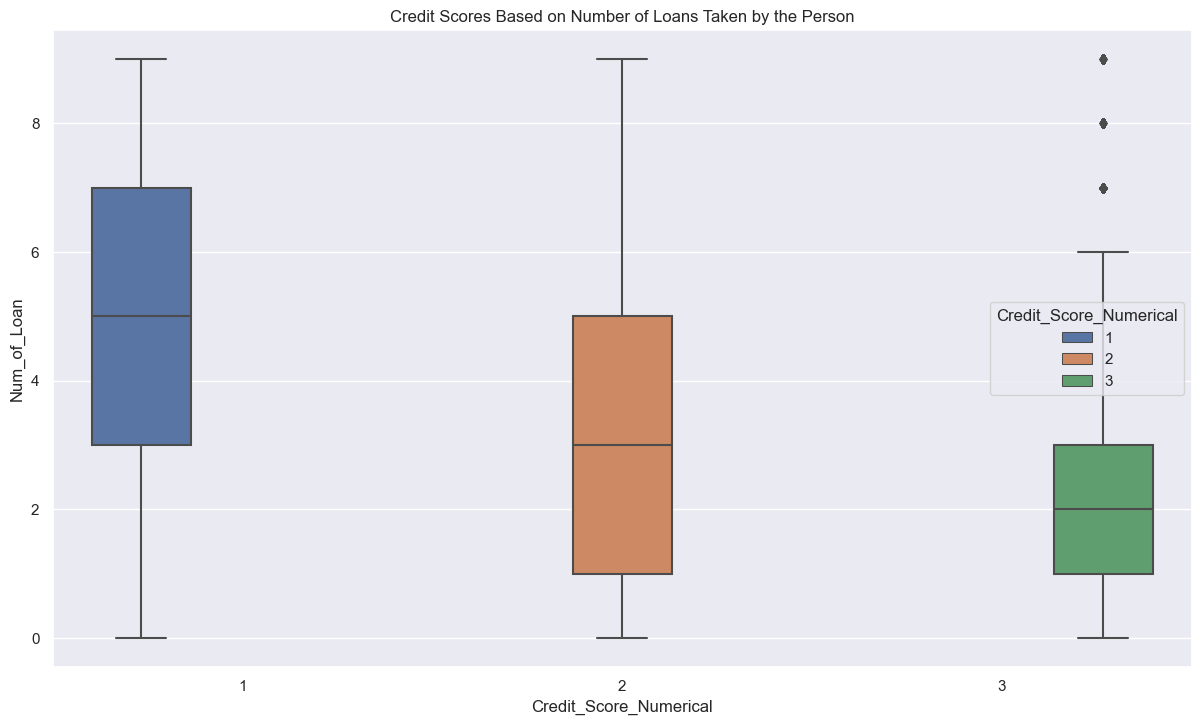

In [55]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Num_of_Loan",hue="Credit_Score_Numerical").set(title='Credit Scores Based on Number of Loans Taken by the Person')



[Text(0.5, 1.0, 'Credit Scores Based on Average Number of Days Delayed for Credit card Payments')]

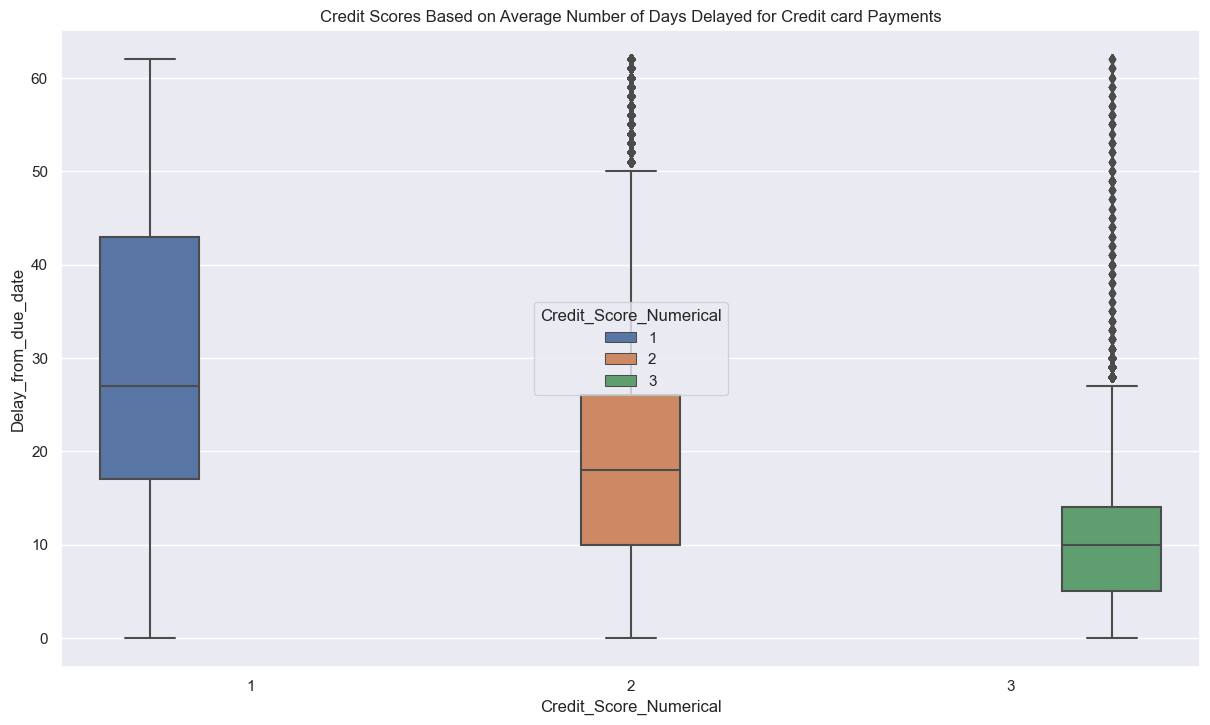

In [56]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Delay_from_due_date",hue="Credit_Score_Numerical").set(title='Credit Scores Based on Average Number of Days Delayed for Credit card Payments')


[Text(0.5, 1.0, 'Credit Scores Based on Number of Delayed Payments')]

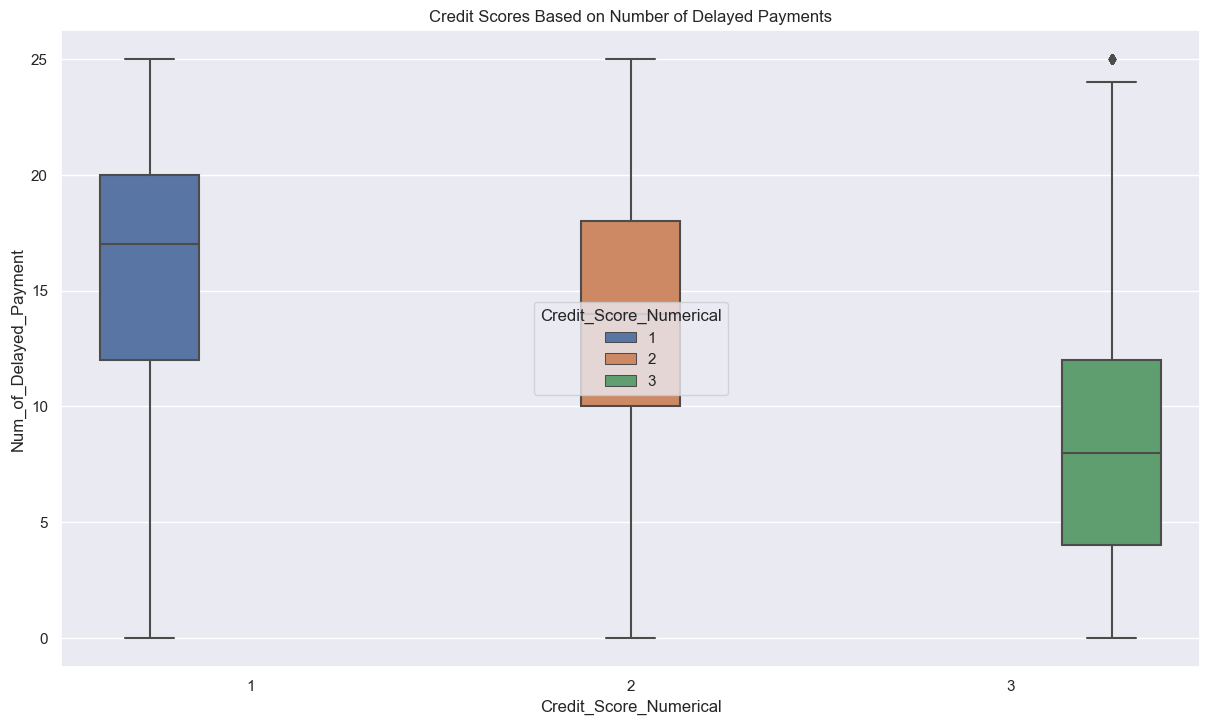

In [57]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Num_of_Delayed_Payment",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Number of Delayed Payments")


[Text(0.5, 1.0, 'Credit Scores Based on Number of Delayed Payments')]

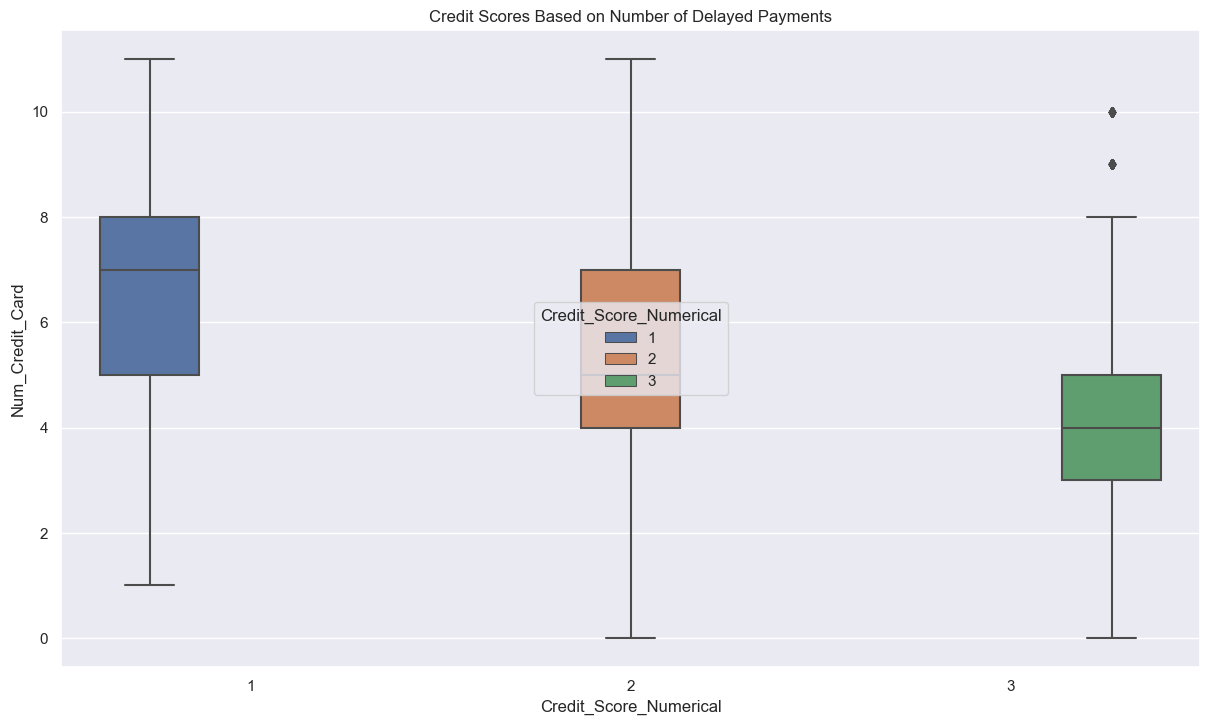

In [70]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Num_Credit_Card",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Number of Credit Cards")


[Text(0.5, 1.0, 'Credit Scores Based on Number of Credit Cards')]

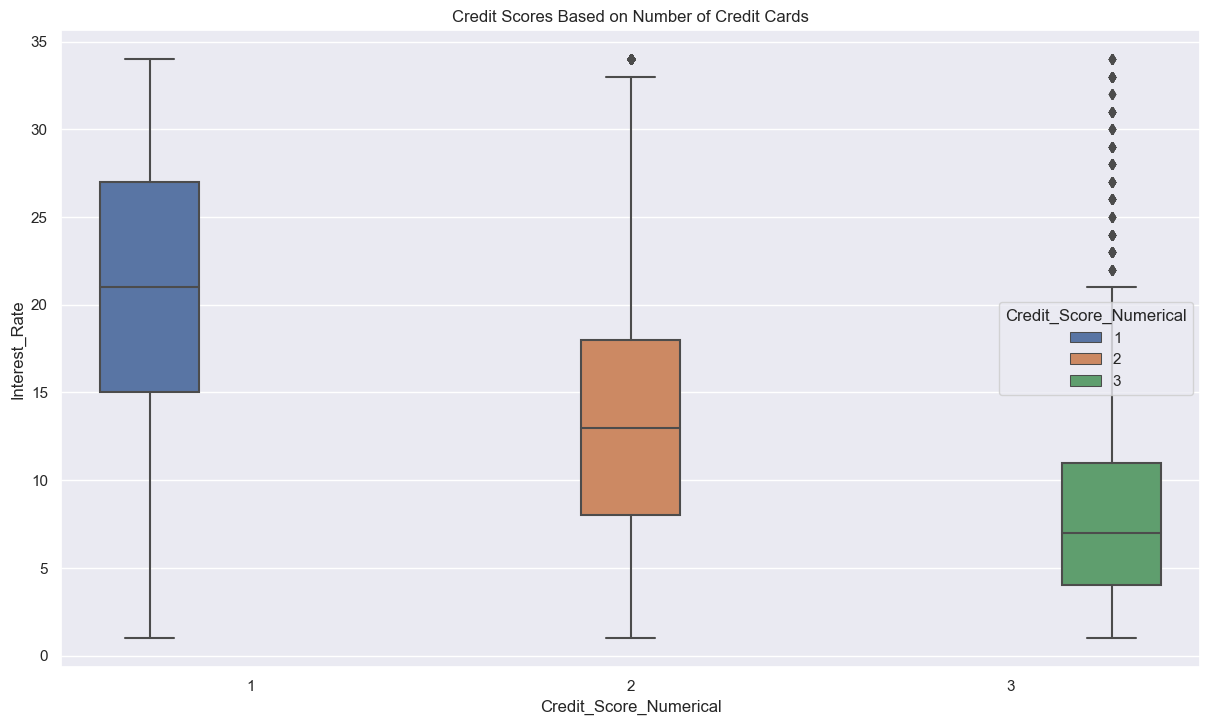

In [71]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Interest_Rate",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Interest Rate")


[Text(0.5, 1.0, 'Credit Scores Based on Interest Rate')]

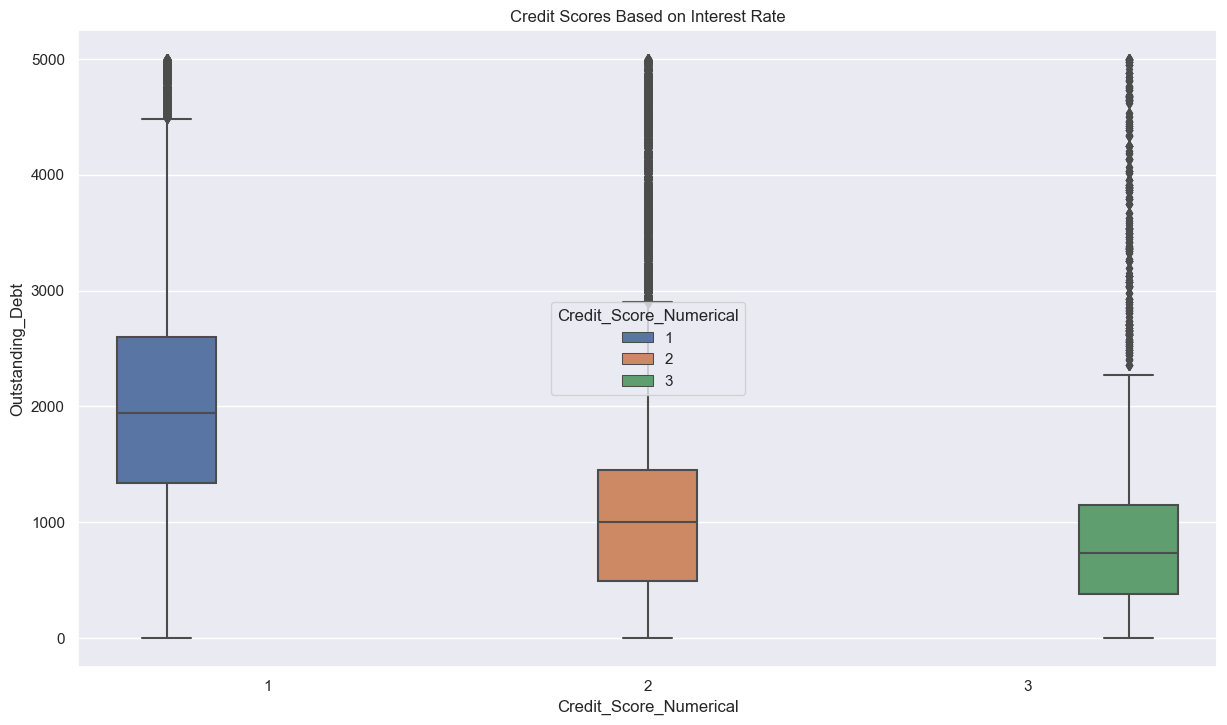

In [72]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Outstanding_Debt",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Interest Rate")


[Text(0.5, 1.0, 'Credit Scores Based on Interest Rate')]

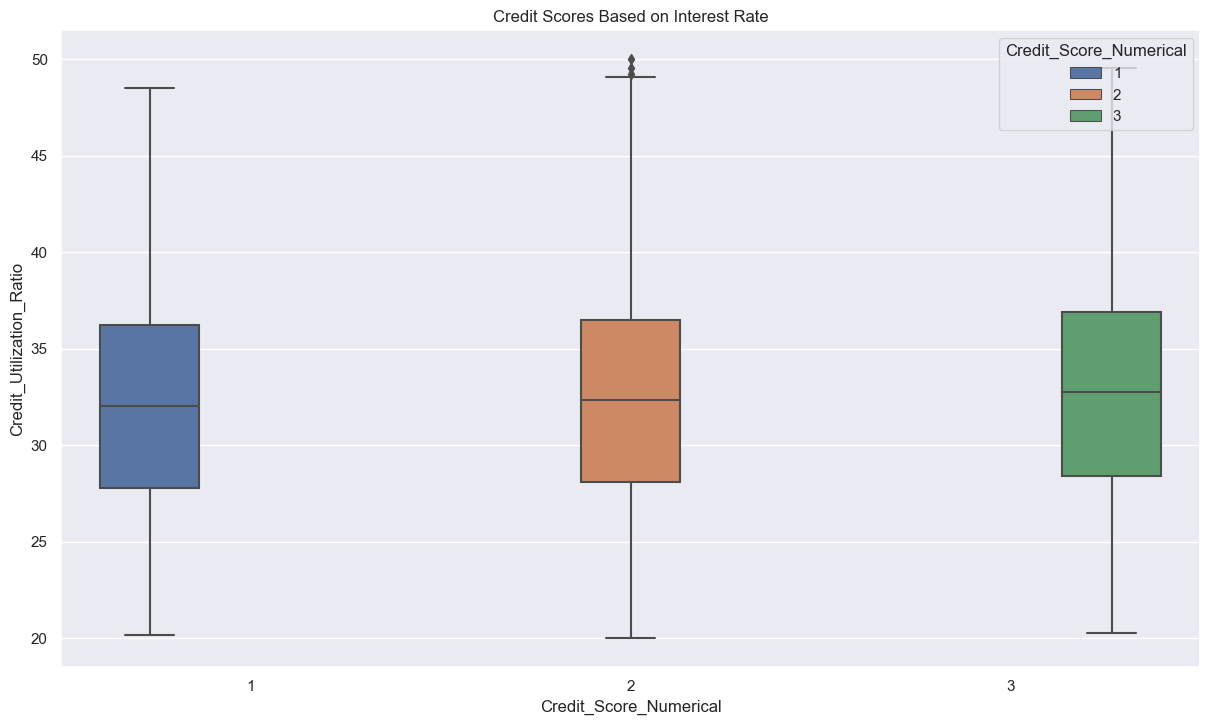

In [73]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Credit_Utilization_Ratio",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Interest Rate")


[Text(0.5, 1.0, 'Credit Scores Based on Interest Rate')]

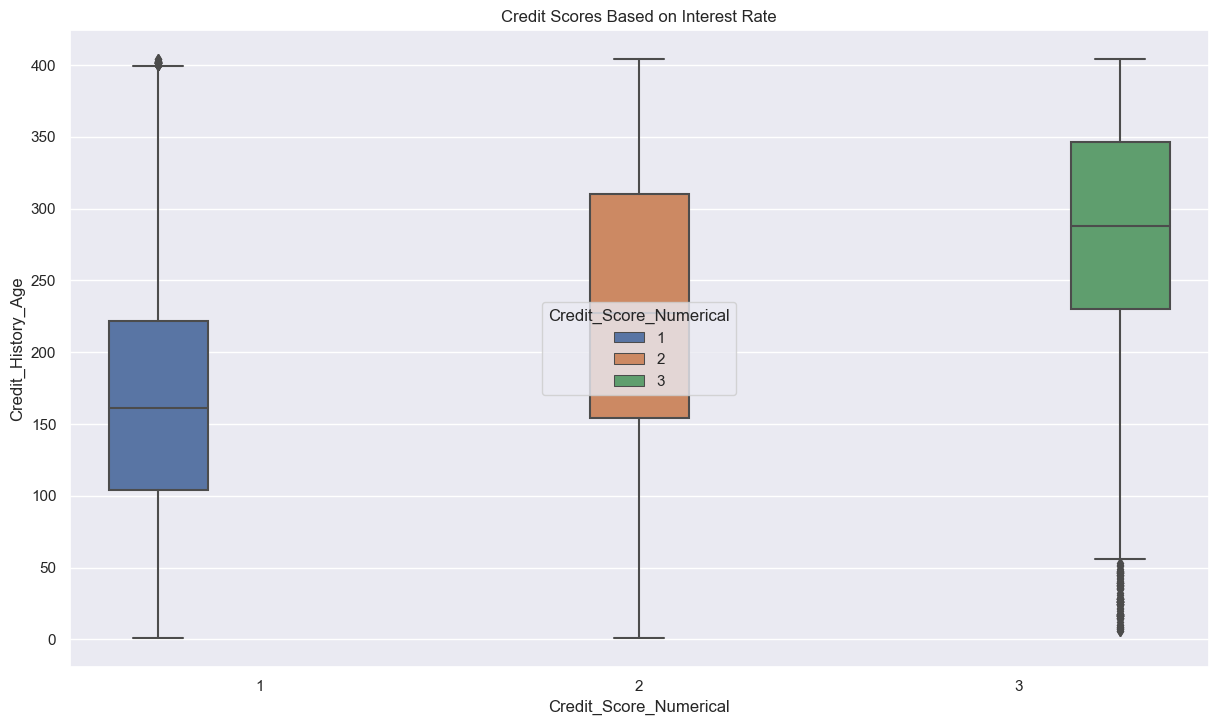

In [74]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Credit_History_Age",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Interest Rate")


[Text(0.5, 1.0, 'Credit Scores Based on Interest Rate')]

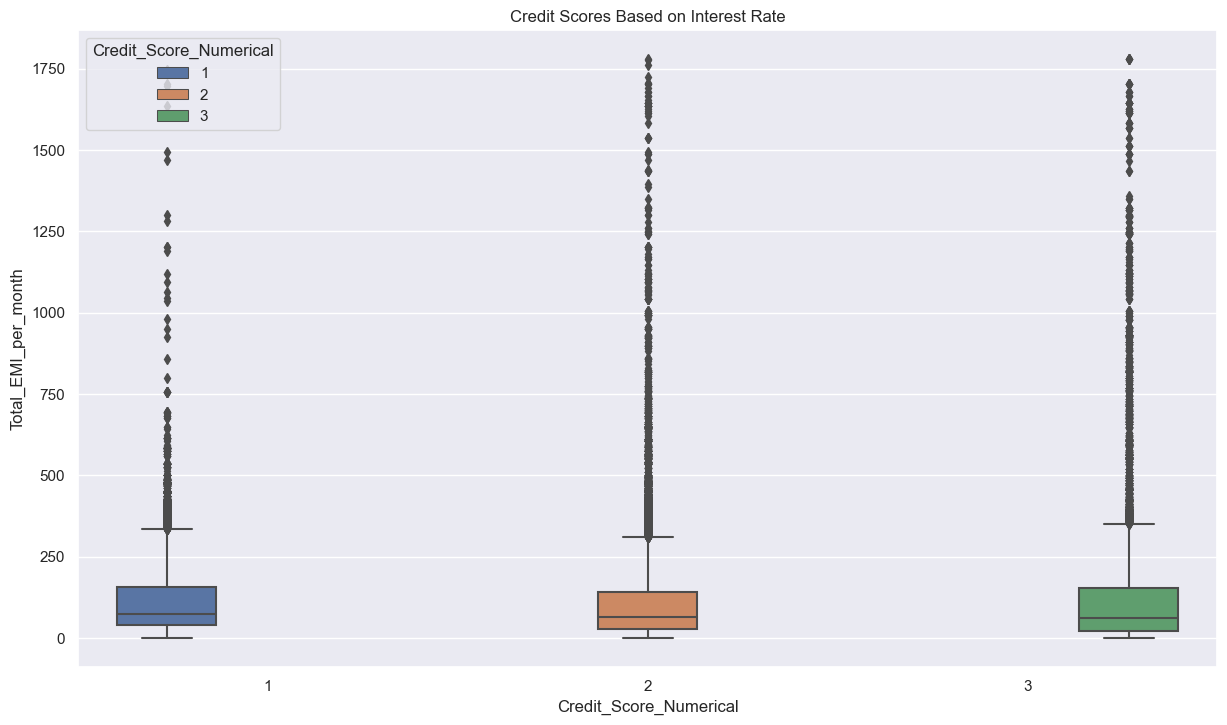

In [75]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Total_EMI_per_month",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Interest Rate")


[Text(0.5, 1.0, 'Credit Scores Based on Interest Rate')]

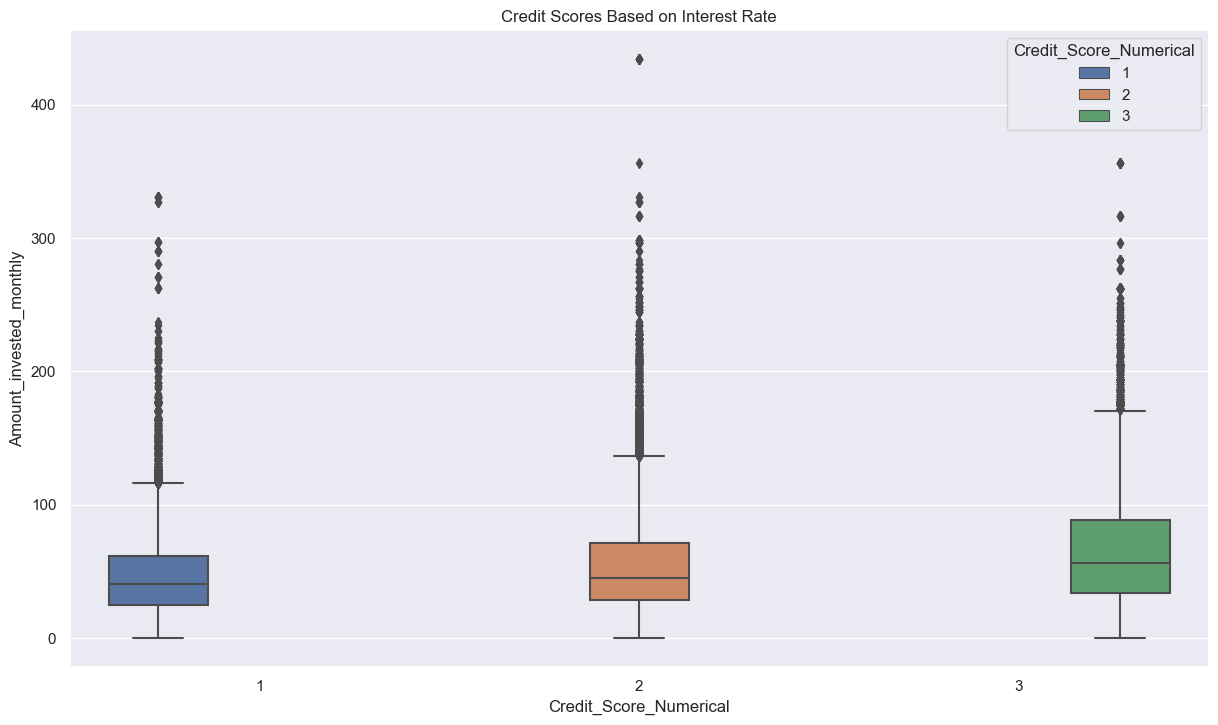

In [76]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Amount_invested_monthly",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Amount Invested Monthly")



[Text(0.5, 1.0, 'Credit Scores Based on Monthly Balance')]

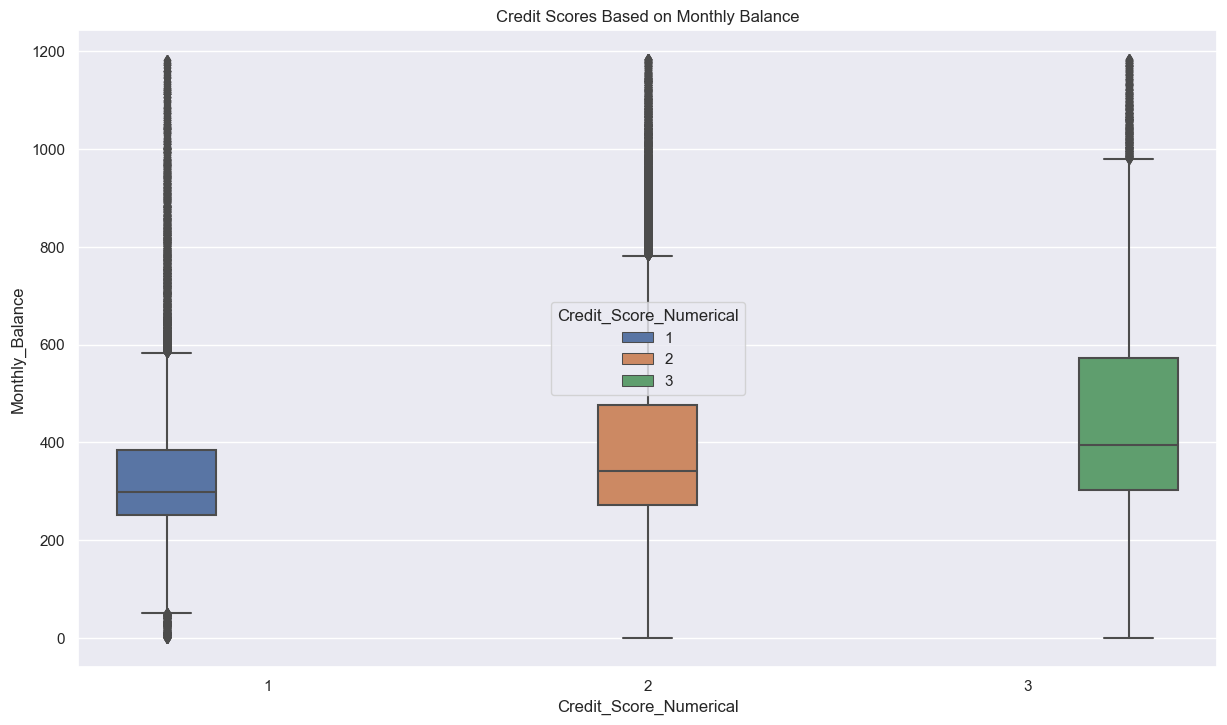

In [77]:
sns.boxplot(data=data, x="Credit_Score_Numerical",y="Monthly_Balance",hue="Credit_Score_Numerical").set(title="Credit Scores Based on Monthly Balance")
